Testing new supply source, datalogging and controller On Off 02 implemented with arduino under equation:

\begin{equation}
P = a_{j}\dfrac{dT}{dt} + T
\end{equation}

libraries required:

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ghiordy F. Contreras\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
tf.__version__

'1.5.0'

loading data set with measures obtained from voltage variatio in the next order:

\begin{equation}
\begin{array}{ccccc}
\rightarrow 4 \rightarrow & 6 \rightarrow & 8 \rightarrow & 10 \rightarrow & 12 \downarrow \\
\downarrow 12 & \leftarrow 10 & \leftarrow 8 & \leftarrow 6 & \leftarrow 4 \\
4 \rightarrow & 6 \rightarrow & 8 \rightarrow & 10 \rightarrow & 12 \downarrow \\
\downarrow 12 & \leftarrow 10 & \leftarrow 8 & \leftarrow 6 & \leftarrow 4 \\
4 \rightarrow & 6 \rightarrow & 8 \rightarrow & 10 \rightarrow & 12 \downarrow \\
12 & \leftarrow 10 & \leftarrow 8 & \leftarrow 6 & \leftarrow 4 \\
\end{array}
\end{equation}

to obtain trasnfer function model of $50$  resistor for solar incubator

# Proof number 1

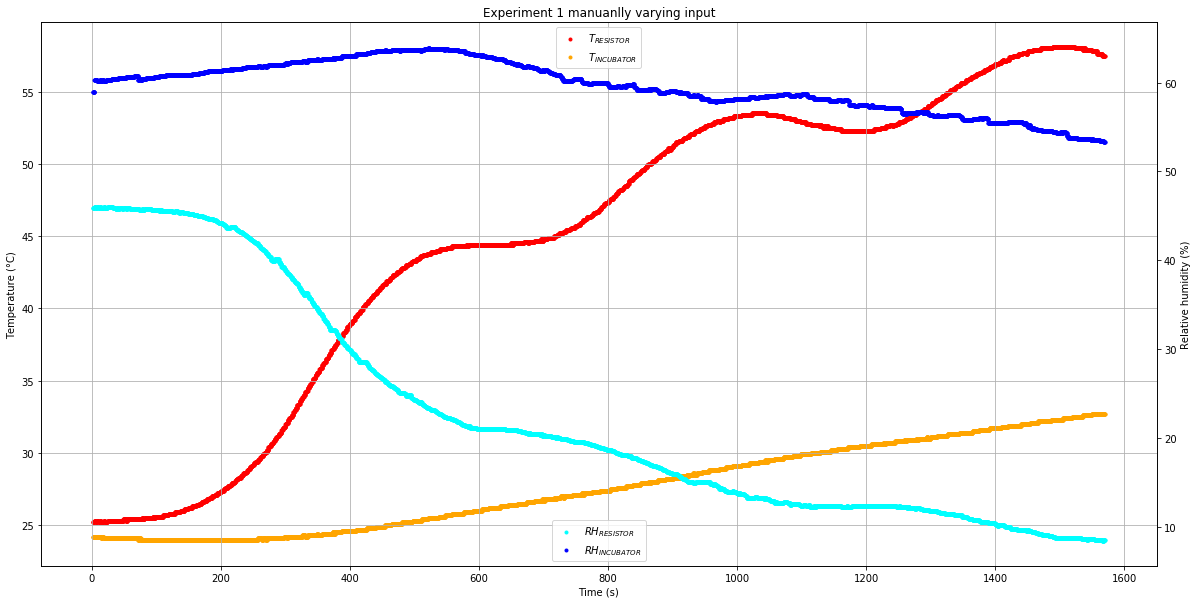

,Time,Resistor_temp,Resistor_rh,Incubator_temp,Incubator_rh,Voltage,Current,Power
count,6.952000e+03,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000
mean,7.850129e+05,44.997785,22.516643,27.622540,59.557739,8.084698,1.237714,10.968134
std,4.528504e+05,10.563161,12.468709,2.924704,2.833802,2.584750,0.475768,6.452221
min,2.432000e+03,25.200000,8.400000,24.000000,53.300000,0.070000,0.000000,0.000000
25%,3.926932e+05,38.400000,12.300000,24.600000,57.500000,6.250000,0.930000,6.220000
50%,7.847905e+05,46.700000,19.000000,27.300000,59.900000,8.270000,1.220000,10.790000
75%,1.177068e+06,53.200000,30.500000,30.400000,61.900000,10.300000,1.590000,16.377000
max,1.569586e+06,58.100000,46.000000,32.700000,63.900000,12.490000,2.480000,29.884000


In [34]:
# data1 is voltage varing using fist prototipe, without differential responses
data1 = pd.read_csv('DATA/50W/D20190403a.txt',
                 names=['Time','Resistor_temp','Resistor_rh',
                        'Incubator_temp','Incubator_rh',
                        'Voltage','Current'])
# carrying to matrix
time1 = np.array(data1.Time,  dtype=float)
temp_re1    = np.array(data1.Resistor_temp,  dtype=float)
rh_re1 = np.array(data1.Resistor_rh,  dtype=float)
temp_in1    = np.array(data1.Incubator_temp,  dtype=float)
rh_in1 = np.array(data1.Incubator_rh,  dtype=float)
#fig, ax1 = plt.subplots(figsize=(40,10))
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.scatter(time1/1000,temp_re1, marker = '.',c= 'red', 
            label = '$T_{RESISTOR}$')
ax1.scatter(time1/1000,temp_in1, marker = '.', c= 'orange', 
            label = '$T_{INCUBATOR}$')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)')#, color = 'orange')
#ax1.tick_params('y'), colors = 'orange')
#ax1.axis([0,700,25.5,37])
ax1t = ax1.twinx()
ax1t.scatter(time1/1000,rh_re1, marker = '.', c= 'cyan',
             label = '$RH_{RESISTOR}$')
ax1t.scatter(time1/1000,rh_in1, marker = '.', c= 'blue',
             label = '$RH_{INCUBATOR}$')
ax1t.set_ylabel('Relative humidity (%)')#, color = 'blue')
#ax1t.tick_params('y', colors = 'blue')
#ax1t.axis([0,700,21,42])
ax1.grid(True)
#ax1.axis([0,100,22,50])
#plt.tight_layout()
ax1.legend(loc=9)
ax1t.legend(loc=8)
plt.title('Experiment 1 manuanlly varying input')
plt.savefig('exp1_t_rh.svg')
plt.savefig('exp1_t_rh.png')
plt.show()
m = np.array(data1.Voltage)
m[m < 0] = 0
data1.update({'Voltage':m})
m = np.array(data1.Current)
m[m < 0] = 0
data1.update({'Current':m})
data1['Power'] = data1.Voltage * data1.Current
data1.describe()

# Proof number 2

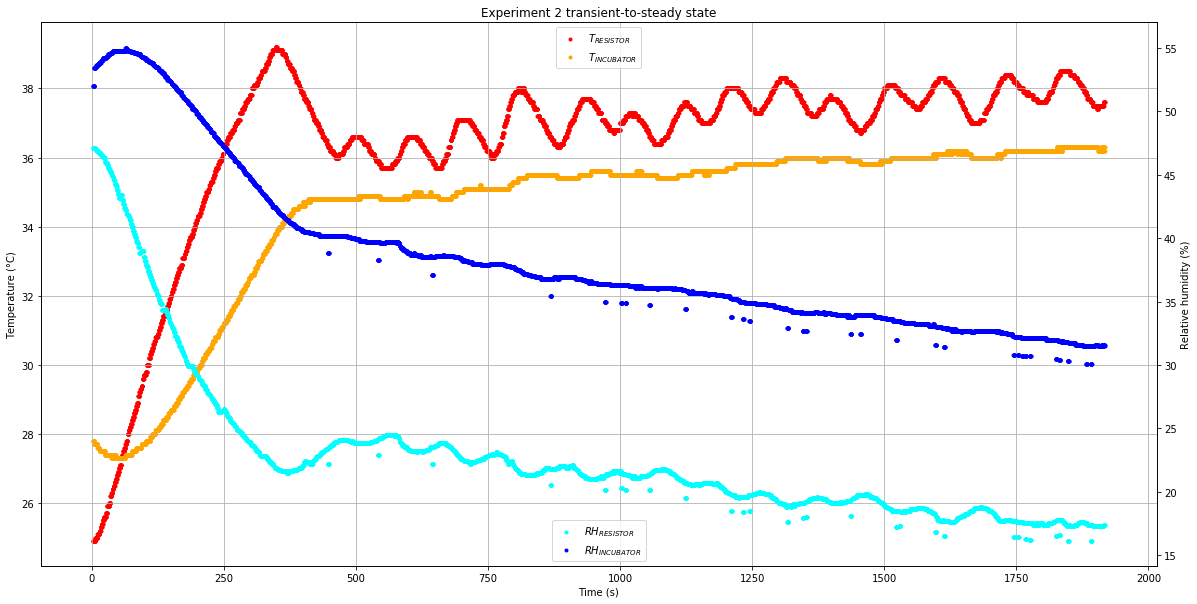

,Time,Resistor_temp,Resistor_rh,Incubator_temp,Incubator_rh,Voltage,Current,Power
count,8.389000e+03,8389.000000,8389.000000,8389.000000,8389.000000,8389.000000,8389.000000,8389.000000
mean,9.586723e+05,36.450352,22.733592,34.485398,38.372893,12.395306,0.794264,9.713597
std,5.532995e+05,2.637973,6.081536,2.475416,6.354200,0.172900,0.824334,10.045469
min,2.239000e+03,24.900000,16.100000,27.300000,30.100000,11.830000,0.000000,0.000000
25%,4.793640e+05,36.400000,19.100000,34.800000,33.900000,12.270000,0.000000,0.000000
50%,9.584380e+05,37.200000,21.400000,35.500000,36.400000,12.350000,1.000000,12.350000
75%,1.437785e+06,37.800000,23.500000,36.000000,40.200000,12.570000,1.440000,17.712000
max,1.917249e+06,39.200000,47.100000,36.300000,55.000000,12.610000,3.440000,41.452000


In [40]:
# data2 second prototype of controller wiht dT/dt improved
data2 = pd.read_csv('DATA/50W/D20190403b.txt',
                 names=['Time','Resistor_temp','Resistor_rh',
                        'Incubator_temp','Incubator_rh',
                        'Voltage','Current'])
# carrying to matrix
time2 = np.array(data2.Time,  dtype=float)
temp_re2    = np.array(data2.Resistor_temp,  dtype=float)
rh_re2 = np.array(data2.Resistor_rh,  dtype=float)
temp_in2    = np.array(data2.Incubator_temp,  dtype=float)
rh_in2 = np.array(data2.Incubator_rh,  dtype=float)
#fig, ax1 = plt.subplots(figsize=(40,10))
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.scatter(time2/1000,temp_re2, marker = '.',c= 'red', 
            label = '$T_{RESISTOR}$')
ax1.scatter(time2/1000,temp_in2, marker = '.', c= 'orange', 
            label = '$T_{INCUBATOR}$')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)')#, color = 'orange')
#ax1.tick_params('y'), colors = 'orange')
#ax1.axis([0,700,25.5,37])
ax1t = ax1.twinx()
ax1t.scatter(time2/1000,rh_re2, marker = '.', c= 'cyan',
             label = '$RH_{RESISTOR}$')
ax1t.scatter(time2/1000,rh_in2, marker = '.', c= 'blue',
             label = '$RH_{INCUBATOR}$')
ax1t.set_ylabel('Relative humidity (%)')#, color = 'blue')
#ax1t.tick_params('y', colors = 'blue')
#ax1t.axis([0,700,21,42])
ax1.grid(True)
#ax1.axis([0,100,22,50])
#plt.tight_layout()
ax1.legend(loc=9)
ax1t.legend(loc=8)
plt.title('Experiment 2 transient-to-steady state')
plt.savefig('exp2_t_rh.svg')
plt.savefig('exp2_t_rh.png')
plt.show()
m = np.array(data2.Voltage)
m[m < 0] = 0
data2.update({'Voltage':m})
m = np.array(data2.Current)
m[m < 0] = 0
data2.update({'Current':m})
data2['Power'] = data2.Voltage * data2.Current
data2.describe()

# Proof number 3

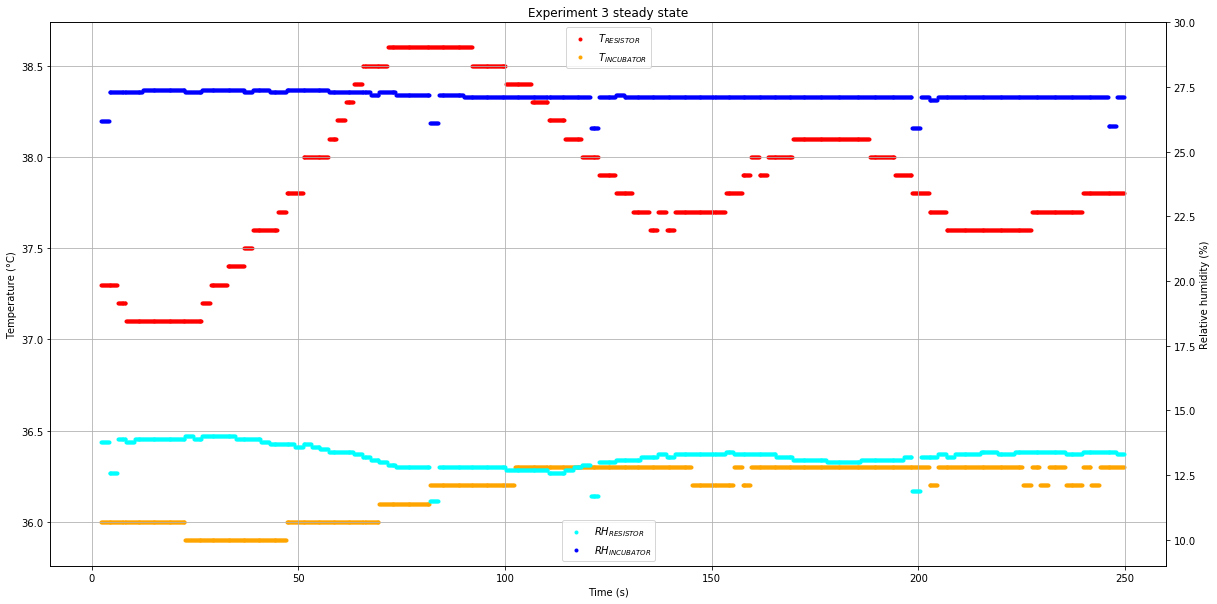

,Time,Resistor_temp,Resistor_rh,Incubator_temp,Incubator_rh,Voltage,Current,Power
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,125683.284926,37.876103,13.234651,36.180055,27.130607,12.311875,0.779458,9.481835
std,71466.797006,0.414390,0.444597,0.144756,0.258278,0.169896,0.705672,8.578271
min,2241.000000,37.100000,11.500000,35.900000,25.900000,11.960000,0.000000,0.000000
25%,63867.750000,37.600000,13.000000,36.000000,27.100000,12.180000,0.000000,0.000000
50%,125587.500000,37.800000,13.300000,36.200000,27.100000,12.220000,1.185000,14.412550
75%,187391.500000,38.100000,13.400000,36.300000,27.300000,12.490000,1.440000,17.496000
max,249645.000000,38.600000,14.000000,36.300000,27.400000,12.570000,1.810000,21.720000


In [36]:
# data3 steady state analysis
data3 = pd.read_csv('DATA/50W/D20190403d.txt',
                 names=['Time','Resistor_temp','Resistor_rh',
                        'Incubator_temp','Incubator_rh',
                        'Voltage','Current'])
# carrying to matrix
time3 = np.array(data3.Time,  dtype=float)
temp_re3    = np.array(data3.Resistor_temp,  dtype=float)
rh_re3 = np.array(data3.Resistor_rh,  dtype=float)
temp_in3    = np.array(data3.Incubator_temp,  dtype=float)
rh_in3 = np.array(data3.Incubator_rh,  dtype=float)
#fig, ax1 = plt.subplots(figsize=(40,10))
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.scatter(time3/1000,temp_re3, marker = '.',c= 'red', 
            label = '$T_{RESISTOR}$')
ax1.scatter(time3/1000,temp_in3, marker = '.', c= 'orange', 
            label = '$T_{INCUBATOR}$')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)')#, color = 'orange')
#ax1.tick_params('y'), colors = 'orange')
#ax1.axis([0,700,25.5,37])
ax1t = ax1.twinx()
ax1t.scatter(time3/1000,rh_re3, marker = '.', c= 'cyan',
             label = '$RH_{RESISTOR}$')
ax1t.scatter(time3/1000,rh_in3, marker = '.', c= 'blue',
             label = '$RH_{INCUBATOR}$')
ax1t.set_ylabel('Relative humidity (%)')#, color = 'blue')
#ax1t.tick_params('y', colors = 'blue')
ax1t.axis([-10,260,9,30])
ax1.grid(True)
#ax1.axis([0,100,22,50])
#plt.tight_layout()
ax1.legend(loc=9)
ax1t.legend(loc=8)
plt.title('Experiment 3 steady state')
plt.savefig('exp3_t_rh.svg')
plt.savefig('exp3_t_rh.png')
plt.show()
m = np.array(data3.Voltage)
m[m < 0] = 0
data3.update({'Voltage':m})
m = np.array(data3.Current)
m[m < 0] = 0
data3.update({'Current':m})
data3['Power'] = data3.Voltage * data3.Current
data3.describe()

# New supply behaivor

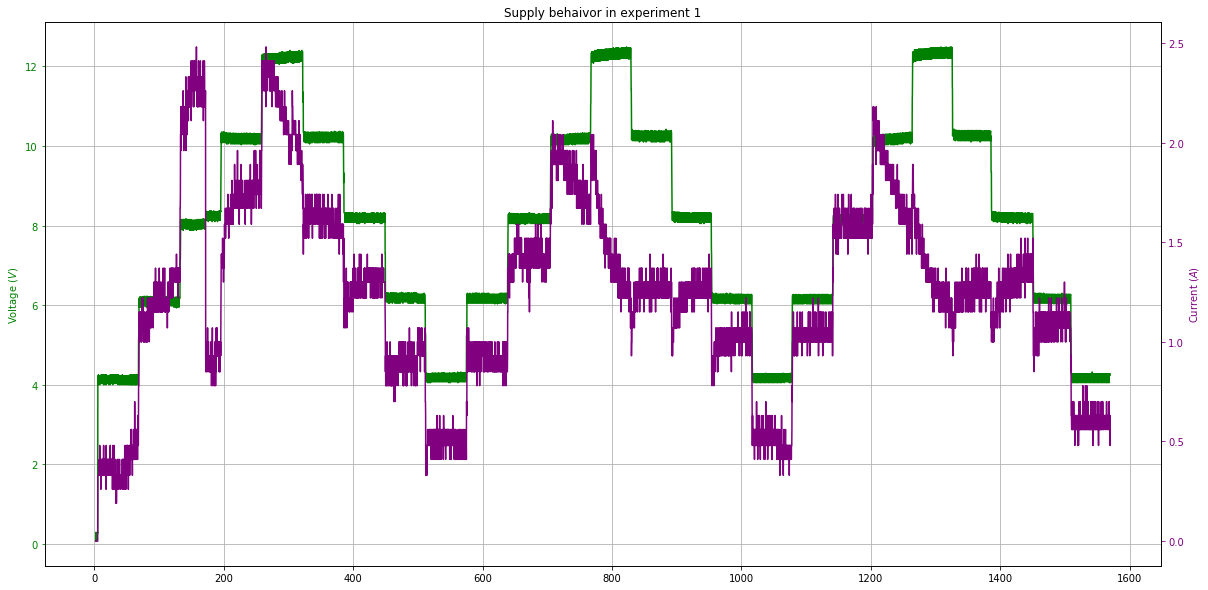

In [37]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(data1.Time/1000,data1.Voltage,color = 'green')
ax1.set_ylabel('Voltage ($V$)', color = 'green')
ax1.tick_params('y', colors = 'green')
ax1.grid(True)
ax1t = ax1.twinx()
ax1t.plot(data1.Time/1000,data1.Current,color = 'purple')
ax1t.set_ylabel('Current ($A$)', color = 'purple')
ax1t.tick_params('y', colors = 'purple')
plt.title('Supply behaivor in experiment 1')
plt.savefig('exp1_p.svg')
plt.savefig('exp1_p.png')
plt.show()

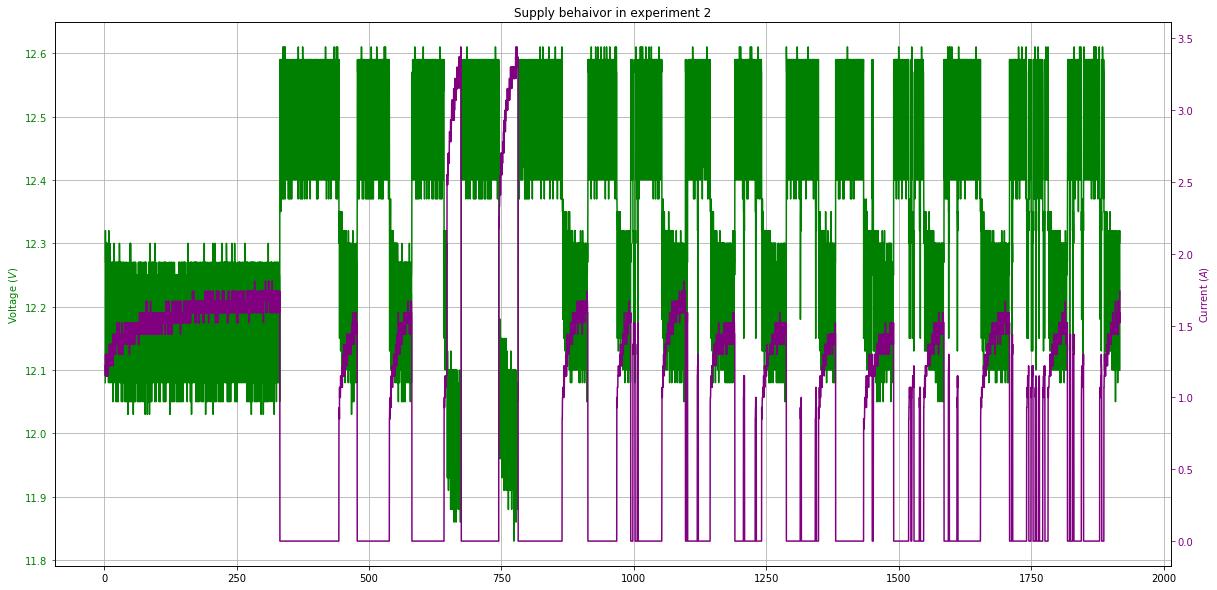

In [43]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(data2.Time/1000,data2.Voltage,color = 'green')
ax1.set_ylabel('Voltage ($V$)', color = 'green')
ax1.tick_params('y', colors = 'green')
ax1.grid(True)
ax1t = ax1.twinx()
ax1t.plot(data2.Time/1000,data2.Current,color = 'purple')
ax1t.set_ylabel('Current ($A$)', color = 'purple')
ax1t.tick_params('y', colors = 'purple')
plt.title('Supply behaivor in experiment 2')
plt.savefig('exp2_p.svg')
plt.savefig('exp2_p.png')
plt.show()

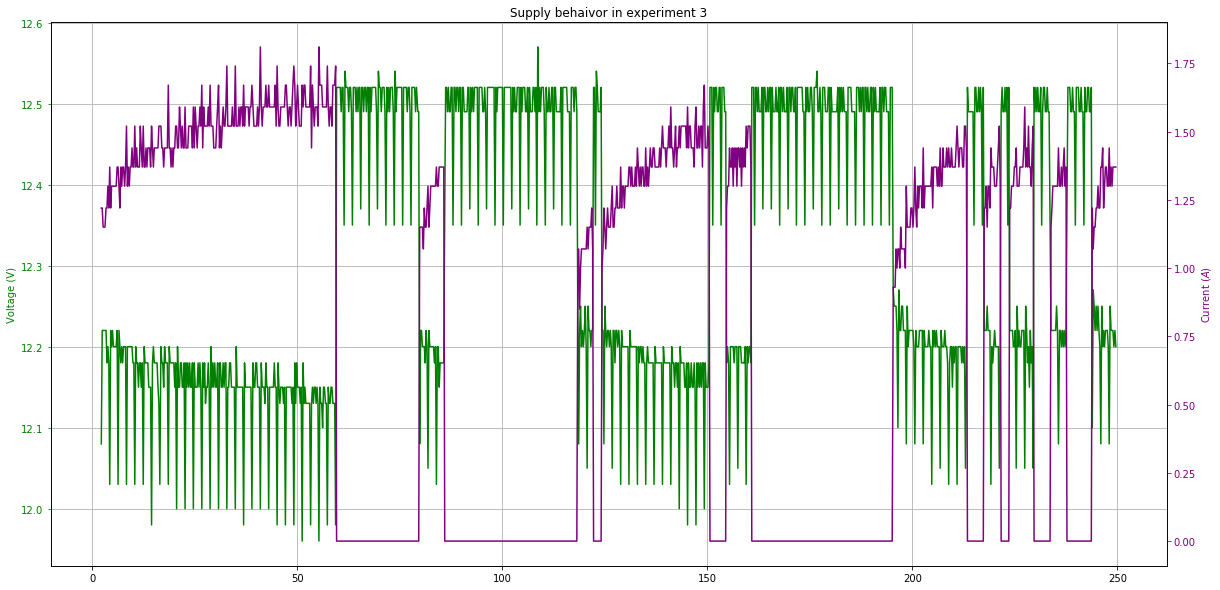

In [42]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(data3.Time/1000,data3.Voltage,color = 'green')
ax1.set_ylabel('Voltage (V)', color = 'green')
ax1.tick_params('y', colors = 'green')
ax1.grid(True)
ax1t = ax1.twinx()
ax1t.plot(data3.Time/1000,data3.Current,color = 'purple')
ax1t.set_ylabel('Current ($A$)', color = 'purple')
ax1t.tick_params('y', colors = 'purple')
plt.title('Supply behaivor in experiment 3')
plt.savefig('exp3_p.svg')
plt.savefig('exp3_p.png')
plt.show()